In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# <h1 style="text-align: center;" class="list-group-item list-group-item-action active" data-toggle="list" role="tab" aria-controls="home">EDA of DATA ANALYST JOBS</h1>

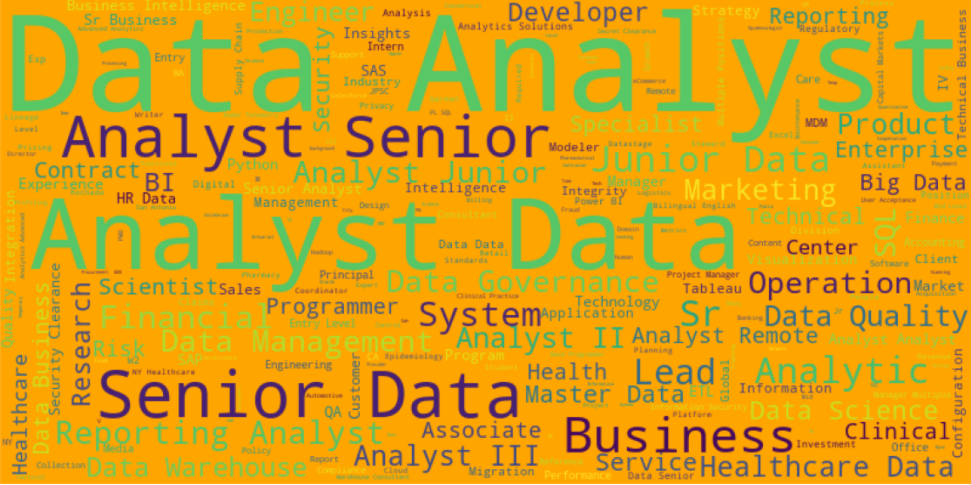

**This study is designed as beginner friendly to help beginners get an idea about EDA study.**

**IMPORTANT NOTE** 

My data science adventure started about 1 year ago. I have gained many valuable friends and trainers on this journey. Thanks to all of them here.

Last year, in July 2021, we studied this data with a group of friends under the leadership of Mr. Kaan Böke. Now, it is a pleasure to work with this EDA again with a group of friends who have just entered the field of data science.

Thanks to Kaan Böke (https://www.kaggle.com/kaanboke), Süleyman Zeynul (https://www.kaggle.com/sleymanzeynul).

**What The Problem Is?**

- This Exploratory Data Analysis (EDA) will focus on overall Data Analyst job title, job description, salary estimate

- You'll be analyzing a dataset that contains more than 2000 job listing for data analyst positions, with features such as **Salary Estimate**, **Location**, **Company Rating**, **Job Description** and more. 

- You are expected to come up with different analyzes such as **finding the best jobs by salary and company rating**, **explore skills required in job descriptions**, **predict salary based on industry, location, company revenue**.

**In this EDA, we will focus on:**
   - Job Title
   - Salary Estimate
   - Job Description
   - Rating
   - Company name
   - Industry
   - Sector

- Review what you need to make an EDA before you start analysing.

## Examining the dataset

**Before beginning your analysis, it's important that you familiarize yourself with the dataset.**

**INSTRUCTIONS**

*   Import related libraries with their alias.
*   Read the dataset into a DataFrame named ``df``
*   Examine the first 5 rows of the ``DataFrame`` (known as the ``'head'``).
*   Examine the last 5 rows of the ``DataFrame`` (known as the ``'tail'``).
*   Examine randomly chosen rows of the ``DataFrame`` (known as the ``'sample'``).
*   Examine the ``DataFrame``'s ``'columns'``.

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
from pylab import rcParams
sns.set_style("darkgrid")

import plotly 
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as py
from plotly.offline import iplot
from plotly.subplots import make_subplots
import plotly.figure_factory as ff

import warnings
warnings.filterwarnings("ignore")

In [ ]:
df0 = pd.read_csv("../input/data-analyst-jobs/DataAnalyst.csv")
df = df0.copy()

In [ ]:
df.head()

In [ ]:
df.tail()

In [ ]:
df.sample(5)

In [ ]:
df.columns
# df.keys()

**At first glance:**

*- 'Unnamed: 0' column should be dropped,*

*- Some columns have values (-1, -1.0) that are not compatible with the column contents. It is necessary to replace these values with np.nan*.

*- The 'salary_estimate', 'size' and 'revenue' columns appear to contain numeric values. Numeric values and string values are nested together. In order to benefit from these columns, some adjustments are required.*

*- As seen above, there is no standardization in column names. Since we can obtain data from many different sources, we can encounter column names in many different shapes and formats. It will be useful to standardize the column names at the beginning of our work.*

*- Column names can be standardized with simple coding. However, there is a great library for standardizing column names, 'skimpy'.*

*- I will show it as an application below. However, you can read the article in the link to get more detailed information.*

https://towardsdatascience.com/how-to-clean-messy-pandas-column-names-20dc7400cea7

In [ ]:
!pip install skimpy

In [ ]:
# !pip install skimpy
from skimpy import clean_columns

In [ ]:
columns = ['Unnamed: 0', 'Job Title', 'Salary Estimate', 'Job Description',
       'Rating', 'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Easy Apply']

messy_df = pd.DataFrame(data = [], columns = columns, index = [0])
clean_df = clean_columns(messy_df)
clean_df.columns.tolist()

In [ ]:
df.columns = clean_df.columns.tolist()
df.columns

## Understanding The Variables

**Once I knew all of the variables in the dataset, let's go on getting basic information from dataframe.**

**INSTRUCTIONS**

*   Print shape, len, size and index of the ``DataFrame``
*   Find how many unique values each columns have (known as the ``'nunique'``).
*   Display all columns and their data types (known as the ``'info'``).
*   Get some basic descriptive statistics for all numeric columns (known as the ``'describe'``).
*   Get some basic descriptive statistics for all categoric columns (known as the ``'describe'``).
*   Check for ``missing values``.
*   Check for ``duplicate values``.

...

In [ ]:
df.shape

In [ ]:
len(df)

In [ ]:
df.size

In [ ]:
df.index

In [ ]:
df.nunique()

In [ ]:
df.info()

In [ ]:
df.describe()

In [ ]:
df.describe(include='object').T

In [ ]:
df.isnull().sum()

In [ ]:
plt.figure(figsize = (10, 5))

sns.displot(
    data = df.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)

plt.axvline(0.3, color = "r")
plt.show()

In [ ]:
df.duplicated().value_counts()

***According to the basic examinations on the dataset;***

 *-This is a dataset  that contains more than 2000 job listing for data analyst positions, with features such as Salary Estimate, Location, Company Rating, Job Description and more.*
 
*- We have 2253 rows (Games) and 16 columns (Feature).*
 
*- There **seems** to be no missing value.*
 
*- There **seems** to be no duplicated value*
 
*- 3 columns contain numerical values, 13 columns contain categorical value*
 
*- 'Unnamed: 0' column should be dropped,*

*- Some columns have values (-1, -1.0) that are not compatible with the column contents. It is necessary to replace these values with np.nan. Then check again for missing values*.

*- The 'salary_estimate', 'size' and 'revenue' columns appear to contain numeric values. Numeric values and string values are nested together. In order to benefit from these columns, some adjustments are required.*
 
*- Based on our research interest we will focus on: Job Title, Salary Estimate, Job Description, Rating, Company name, Industry, Sector columns.*

## Necessary Adjustments Before Analysis

**Till now, we have got an overview to dataset to fix any issues before moving on to a more sophisticated analysis.**

**INSTRUCTIONS**

*   Drop the ``Unnamed: 0`` column as it will not contribute to the EDA study and check the ``shape`` again.

*   Replace ``(-1, -1.0, '-1')`` values with ``(np.nan)`` in the columns.

*   Check for ``missing`` and ``duplicate`` values again.

...

In [ ]:
df.drop(['unnamed_0'], axis = 1, inplace = True)
df.shape

Some columns have values ('-1', -1.0) that are not compatible with the column contents. It is necessary to replace these values with np.nan.

In [ ]:
df.replace("-1", np.nan, inplace=True)
df.replace(-1, np.nan, inplace=True)
df.replace(-1.0, np.nan, inplace=True)

In [ ]:
df.isnull().sum()

The operation we did above made the missing values more realistic.

In [ ]:
plt.figure(figsize = (10, 5))

sns.displot(
    data = df.isnull().melt(value_name = "missing"),
    y = "variable",
    hue = "missing",
    multiple = "fill",
    height = 9.25)

plt.axvline(0.3, color = "r")
plt.show()

In [ ]:
df.duplicated().value_counts()

## Preparing Dataset

#### To view summary information about the columns, I am going to use a user defined functions seen below.

In [ ]:
def first_look(col):
    print('column name : ', col)
    print('--------------------------------')
    print('Per_of_Nulls   : ', '%', round(df[col].isnull().sum() / df.shape[0]*100, 2))
    print('Num_of_Nulls   : ', df[col].isnull().sum())
    print('Num_of_Uniques : ', df[col].nunique())
    print('Duplicates     : ', df.duplicated(subset = None, keep = 'first').sum())
    print(df[col].value_counts(dropna = False).sort_index())

**INSTRUCTIONS**

*   Divide the data frame into ``numeric`` and ``categoric`` and examine columns one by one under these headings (Optional).
*   In my opinion, this method provides convenience in examining large datasets. However, we will continue our analysis on a column-by-column basis for this data set.
*   In this analysis, we will concentrate on the following areas: 
    - Job Title
    - Salary Estimate
    - Job Description
    - Rating
    - Company name
    - Industry
    - Sector

...

#### Let's see how to divide the data frame into numeric and categoric columns.

In [ ]:
numerical= df.select_dtypes('number').columns

categorical = df.select_dtypes('object').columns

print('---------------------')
print(f'Numerical Columns:  {df[numerical].columns}')
print('---------------------')
print(f'Categorical Columns: {df[categorical].columns}')
print('---------------------')

#### Numerical Columns

In [ ]:
numerical

#### Categorical Columns

In [ ]:
categorical

**Now, let's examine each column in our agenda one by one and make the necessary, required adjustment.**

#### 'job_title' column

**INSTRUCTIONS**

*   Examine the ``'job_title'`` column to get an ``overview`` of the column. You may use above given ``user defined function``.

*   Count the job titles by using ``value_counts()``.

*   Try to find the  ``anomalies`` in the ``job_title`` column like ``Sr. Data Analyst``, ``Sr Data Analyst``, ``Data Analyst Senior``.
    
*   Fix any ``anomalies`` you find. You may standardize the job titles with ``str.replace``.

*   Check what you fixed by counting job titles again.

...

In [ ]:
first_look('job_title')

In [ ]:
df['job_title'].value_counts(dropna=False).head(20)

In [ ]:
df['job_title'].sample(20)

It can be easily seen same jobs were named as if they are different jobs. Such as;

    - "**Senior Data Analyst**" and "**Sr. Data Analyst**"
    
    - "**Junior Data Analyst**" and "**Jr. Data Analyst**"
    
In terms of the reliability and accuracy of the work we will do, we need to deal with it.

In [ ]:
# df['job_title']=df['job_title'].replace({"Sr. Data Analyst":"Senior Data Analyst", "Sr Data Analyst":"Senior Data Analyst", "Jr. Data Analyst":"Junior Data Analyst", "Jr Data Analyst":"Junior Data Analyst", "Sr Analyst Data":"Senior Analyst Data"})

df['job_title'] = df['job_title'].str.replace("Sr. Data Analyst", "Senior Data Analyst")
df['job_title'] = df['job_title'].str.replace("Sr Data Analyst", "Senior Data Analyst")
df['job_title'] = df['job_title'].str.replace("Data Analyst Senior", "Senior Data Analyst")
df['job_title'] = df['job_title'].str.replace('Jr. Data Analyst','Junior Data Analyst')
df['job_title'] = df['job_title'].str.replace('Jr Data Analyst','Junior Data Analyst')
df['job_title'] = df['job_title'].str.replace('Data Analyst Junior','Junior Data Analyst')

In [ ]:
df['job_title'].value_counts(dropna=False).head(20)

####  'salary_estimate' column

**INSTRUCTIONS**

*   Examine the ``salary_estimate`` column to get an overview of the column.

*   There is a ``missing`` value. Since the column is important for analyze, decide how to deal with this ``missing`` value.

*   Type of the  ``salary_estimate`` column is ``object``. In its current form, it is not possible to perform mathematical operations that make use of the numerical values in the column values. Therefore, ``create`` columns ``'salary_maximum'``, ``'salary_minimum'`` and ``'salary_average'`` with ``float`` type using column ``values (ex $53K-$104K)`` from column ``'salary_estimate'`` (``Feature Engineering``).

*   Hint: ($53K-$104K) --> for ``'salary_minimum'`` take the ``first`` number, for ``'salary_maximum'`` take the ``second`` number,  for ``'salary_average'`` get the ``sum`` of ``first`` and ``second`` numbers and ``divide by 2``.

*   Check what you have done by getting samples or displaying first 5 rows.

...

In [ ]:
first_look('salary_estimate')

**Dealing with missing values in the 'salary_estimate' column**

In the Salary Estimate column there are 3 key issues that we have to deal with. The first of these is missing value. The second is the data type of the column. The third is that we cannot benefit from the numerical values in the column in their current form.

Let's start with the first issue, missing value. 

Here we have only 1 missing value.

There are several approaches to deal with missing values such as dropping, replacing. 

Various solutions can be produced to fill 1 missing value. Now let's see what we can do by looking at the row containing the missing value.

In [ ]:
df[df['salary_estimate'].isnull()]

Let's see whether there is any other job ad by the same company

In [ ]:
df[df['company_name']=='Protingent\n4.4']

There is another ad by the same company

In [ ]:
df['job_description'][2123]

In [ ]:
df['job_description'][2149]

Based on above job descriptions, there are some similarities between two job titles. However, when having a closer look, it can be inferred that job title with missing salary estimate needs more qualifications than the other job title does. So it is better for us to drop missing value for the sake of our analysis.

In [ ]:
df.dropna(axis = 0, subset = ['salary_estimate'], inplace = True)
df.shape

In [ ]:
df['salary_estimate'].isnull().sum()

**To get Numeric values from 'salary_estimate' column**

In [ ]:
df['salary_estimate'].sample(5)

By getting rid of the values other than numbers in this column, we can create the following columns and make more meaningful evaluations.
- maximum salary column
- minimum salary column
- average salary column

Let's start.

In [ ]:
df['salary_maximum'] = df['salary_estimate'].str[6:10].str.replace('K','').str.lstrip('$').str.strip().astype('float')

In [ ]:
df['salary_minimum'] = df['salary_estimate'].str.lstrip("$").str[:3].str.replace("K", "").str.strip().astype("float")

In [ ]:
df['salary_average'] = (df['salary_maximum'] + df['salary_minimum']) / 2

Let's check what we have after changes we have made.

In [ ]:
df[['salary_estimate', 'salary_maximum', 'salary_minimum', 'salary_average']].sample(5)

In [ ]:
df.head(1)

#### 'job_description' column

**INSTRUCTIONS**

*   Examine the ``job_description`` column to get an overview of the column.

*   Get the first ``job_description`` by ``indexing``to see what it looks like.

*   Find the required skills for a Data Analyst that are ``Python``, ``SQL``, ``Excell`` and ``Tableau`` in ``'job_description'`` column and create ``'python'``, ``'SQL'``, ``excell'`` and ``tableau'`` columns according to these values. ``str.contains()`` may help you while creating new columns.

* Display the ``value counts`` and ``proportions`` of each newly created column with ``value_counts``.

...

In [ ]:
first_look('job_description')

Let_s look at the first job description to see what it looks for.

In [ ]:
df['job_description'][0]

Each job_description gives a lot of information about job requirements. Here we will concentrate on Python, Excel, SQL and Tableau. Let's start.

In [ ]:
df['python'] = df['job_description'].str.contains('Python', na=False, case=False)

In [ ]:
df['python'].value_counts(dropna=False)

In [ ]:
df['python'].value_counts(normalize=True) * 100

In [ ]:
df['SQL'] = df['job_description'].str.contains('SQL', na=False, case=False)

In [ ]:
df['SQL'].value_counts(dropna=False)

In [ ]:
df['SQL'].value_counts(normalize=True) * 100

In [ ]:
df['excell'] = df['job_description'].str.contains('Excel', na=False, case=False)

In [ ]:
df['excell'].value_counts(dropna=False)

In [ ]:
df['excell'].value_counts(normalize=True) * 100

In [ ]:
df['tableau'] = df['job_description'].str.contains('Tableau', na=False, case=False)

In [ ]:
df['tableau'].value_counts(dropna=False)

In [ ]:
df['tableau'].value_counts(normalize=True) * 100

#### 'rating' column

**INSTRUCTIONS**

*   Examine the ``rating`` column to get an overview of the column.

*   There ara ``missing`` values. Decide what to do with them.

*   If you decide to keep them to use salary and job title info on that rows, how can you fill missing values?

...

In [ ]:
first_look('rating')

We have 272 missing values. This time, the number of missing values is a bit too much. Other column information corresponding to these rows is important. We must not lose them. 

Therefore, I will fill missing values in this column with the help of the user defined function given below.

This function fills the missing values with "ffill and bfill method" according to single-stage grouping.

In [ ]:
def fill_prop(df, group_col, col_name):
    '''Fills the missing values with "ffill and bfill method" according to single-stage grouping'''
    for group in list(df[group_col].unique()):
        cond = df[group_col]==group
        grp_inx = list(df[cond][col_name].index)
        df.loc[cond, col_name] = df.loc[cond, col_name].fillna(method="ffill").fillna(method="bfill")
    df[col_name] = df[col_name].fillna(method="ffill").fillna(method="bfill")
    print("Number of NaN : ",df[col_name].isnull().sum())
    print("------------------")
    print(df[col_name].value_counts(dropna=False).sort_index())

In [ ]:
fill_prop(df, 'job_title', 'rating')

In [ ]:
df['rating'].isnull().sum()

#### 'company_name' column

**INSTRUCTIONS**

*   Examine the ``company_name`` column to get an overview of the column.

*   There are some ``numbers`` attached to the company names. Get rid of them.

*   There is a ``missing value``. Check whether it can be filled via other columns or not. If not keep it.

...

In [ ]:
first_look('company_name')

Something weird with the company names. Let's get samples from the dataframe

In [ ]:
df['company_name'].sample(10)

As can be seen above, some numbers are attached to the company names in the 'company_name' column. These numbers can be rating values. Let's check.

In [ ]:
df[['rating', 'company_name']].sample(10)

Yes, as seen above, the numbers at the end belong to the rating values. We have to get rid of these numbers.  Additionally, those without ratings attached at the end have missing rating scores

But, remember we have missing values in 'rating' column. Let's check with 'company_name' column values.

In [ ]:
df[df['rating'].isnull()][['rating', 'company_name']]

As you can see above, we cannot fill the 'rating' column values with the 'company_name' column values.
So let's get rid of the numbers in the company_name column.

In [ ]:
df['company_name'] = df['company_name'].str.split("\n").str[0]

In [ ]:
df['company_name'].sample(10)

Let's check what can be done for missing value in the 'company_name' column.

In [ ]:
df['company_name'].isnull().sum()

In [ ]:
df[df['company_name'].isnull()]

In [ ]:
df[df['location']=='Mooresville, NC']['company_name']

I will not fill missing value. We can keep this row, for job title, salary and job description

#### 'industry' column

**INSTRUCTIONS**

*   Examine the ``industry`` column to get an overview of the column.

*   Everything seems ok. But there are missing values. Keep them for the sake of further analysis.

...

In [ ]:
first_look('industry')

In [ ]:
df['industry'].sample(10)

We will keep the rows which has missing value on Industry.

#### 'sector' column

**INSTRUCTIONS**

*   Examine the ``industry`` column to get an overview of the column.

*   Everything seems ok. But there are missing values. Keep them for the sake of further analysis.

...

In [ ]:
first_look('sector')

In [ ]:
df['sector'].sample(10)

We will keep the rows which has missing value on Industry.

## Analyzing Dataset

We've done the general cleaning of the data so far. From now on, I will create a different datafame with the necessary columns for further analysis.

**INSTRUCTIONS**

*   Display the ``DataFrame``'s ``columns``.
*   Create a new dataframe by copying the ``'job_title', 'rating', 'company_name', 'industry', 'sector', 'salary_maximum', 'salary_minimum', 'salary_average', 'python', 'SQL', 'excell', 'tableau'`` columns from existing dataframe and named it ``df_analyst``.
*   Examine the first 5 rows of the DataFrame (known as the ``'head'``).
*   Display all columns and their data types (known as the ``'info'``).
*   Check for ``missing values``.
*   Get some basic descriptive statistics for all numeric columns (known as the ``'describe'``). Comment on the descriptive statistics of numeric features.
*   Get some basic descriptive statistics for all categoric columns (known as the ``'describe'``).

**Creating a new dataframe from the existing dataframe with related features to analyze**

In [ ]:
df.columns

In [ ]:
df_analyst = df[['job_title', 'rating', 'company_name', 'industry', 'sector', 'salary_maximum', 'salary_minimum', 
                 'salary_average', 'python', 'SQL', 'excell', 'tableau']].copy()
df_analyst.head()

Our data is now ready for use. We will show our ingenuity.

In [ ]:
df_analyst.info()

In [ ]:
df_analyst.isnull().sum()

In [ ]:
df_analyst.describe()

Let's look at the some of the information we can get from above table:

- **Rating**: Mean is very close to median (3.73 and 3.70). There is a slightly right skewed distribution.
- **Salary Minimum**: Average minimum salary is around 54K and median value for minimum salary is around 50K. There is a right skewed distribution. We may expect outliers on minimum side of distribution.
- **Salary Maximum**: Mean is very close to median (89.97 and 87). We can see that it has right skewed distribution. We may expect outliers on minimum side of distribution.
- **Salary Average**: Average salary is around 72K, but still we can expect several outliers for this variable(min= 33.5K, max= 150K)

In [ ]:
df_analyst.describe(include=object)

**Frequencies Visualizations of the categorical columns**

**INSTRUCTIONS**

*   Display first ``20`` row of the ``value counts`` of ``'job_title'`` column and ``visualize`` it with ``sns.countplot``.
*   Display first ``20`` row of the ``value counts`` of ``'company_name'`` column and ``visualize`` it with ``sns.countplot``.
*   Display first ``20`` row of the ``value counts`` of ``'industry'`` column and ``visualize`` it with ``sns.countplot``.
*   Display first ``20`` row of the ``value counts`` of ``'sector'`` column and ``visualize`` it with ``sns.countplot``.
*   Display the ``value counts`` of ``'python', 'SQL', 'excell', 'tableau'`` column and ``plot`` it with ``matplotlib pie`` as ``subplot (2*2)``.

In [ ]:
df_analyst['job_title'].value_counts()[:20]

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'job_title', data = df_analyst, order = df_analyst['job_title'].value_counts()[:20].index)
plt.title('Job Titles', fontsize = 15)
plt.xticks(rotation=90)


for index, value in enumerate(df_analyst['job_title'].value_counts()[:20].values):
    plt.text(index,value,str(value), ha = 'center', va= 'bottom')

 'Data Analyst',  'Senior Data Analyst' and 'Junior Data Analyst' are the top 3 job title that are looked for.

In [ ]:
df_analyst['company_name'].value_counts()[:20]

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'company_name', data = df_analyst, order = df_analyst['company_name'].value_counts()[:20].index)
plt.title('Company Names', fontsize = 15)
plt.xticks(rotation=90)


for index, value in enumerate(df_analyst['company_name'].value_counts()[:20].values):
    plt.text(index,value,str(value), ha = 'center', va= 'bottom')

It can be seen that Staffigo Technical Services has posted significantly more job postings than others.

In [ ]:
df_analyst['industry'].value_counts()[:20]

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'industry', data = df_analyst, order = df_analyst['industry'].value_counts()[:20].index)
plt.title('Industry', fontsize = 15)
plt.xticks(rotation=90)


for index, value in enumerate(df_analyst['industry'].value_counts()[:20].values):
    plt.text(index,value,str(value), ha = 'center', va= 'bottom')

In [ ]:
df_analyst['sector'].value_counts()[:20]

In [ ]:
plt.figure(figsize = (15,8))
sns.countplot(x = 'sector', data = df_analyst, order = df_analyst['sector'].value_counts()[:20].index)
plt.title('Sector', fontsize = 15)
plt.xticks(rotation=90)


for index, value in enumerate(df_analyst['sector'].value_counts()[:20].values):
    plt.text(index,value,str(value), ha = 'center', va= 'bottom')

**Frequency Visualization of the boolean type columns**

In [ ]:
for col in df_analyst.columns[-4:]:
    print('Value Counts of the Job Requirements', '-', col)
    print(df_analyst[col].value_counts(dropna=False))

In [ ]:
# Create a figure for 4 subplots (2 row, 2 columns)
fig, ax = plt.subplots(2, 2, figsize = (15,15))

# Create a pie chart of job requirements
python_counts = df_analyst['python'].value_counts()
ax[0][0].pie(python_counts, labels=python_counts)
ax[0][0].set_title('Python')
ax[0][0].legend(python_counts.keys().tolist())

SQL_counts = df_analyst['SQL'].value_counts()
ax[0][1].pie(SQL_counts, labels=SQL_counts)
ax[0][1].set_title('SQL')
ax[0][1].legend(SQL_counts.keys().tolist())

excell_counts = df_analyst['excell'].value_counts()
ax[1][0].pie(excell_counts, labels=excell_counts)
ax[1][0].set_title('Excell')
ax[1][0].legend(excell_counts.keys().tolist())

tableau_counts = df_analyst['tableau'].value_counts()
ax[1][1].pie(tableau_counts, labels=tableau_counts)
ax[1][1].set_title('Tableau')
ax[1][1].legend(tableau_counts.keys().tolist())

# Add a title to the Figure
fig.suptitle('Job Requirements', fontsize=15)

# Show the figure
fig.show()

**Visualization of the numeric columns**

**INSTRUCTIONS**

Work on the new dataframe ``df_analyst``.

*   Display the ``descriptive statistics`` of the ``numeric columns``.
*   Display ``minimum, maximum, mean, median and mode`` value of the numeric columns.
*   Plot the ``distributions`` of the numeric columns with ``histogram``.
*   Visualize the ``boxplots`` of numeric columns.
*   Display the ``density`` of the numeric columns.

I learned these functions during the 30-day challenge I participated in as part of Azure Data Scientist. I'm sharing it with you because I found it useful. Thank you to the contributors.

In [ ]:
def show_distribution(col):
    '''
    This function will make a distribution (graph) and display it    '''

    # Get statistics
    min_val = col.min()
    max_val = col.max()
    mean_val = col.mean()
    med_val = col.median()
    mod_val = col.mode()[0]

    print('Minimum:{:.2f}\nMean:{:.2f}\nMedian:{:.2f}\nMode:{:.2f}\nMaximum:{:.2f}\n'.format(min_val,
                                                                                            mean_val,
                                                                                            med_val,
                                                                                            mod_val,
                                                                                            max_val))

    # Create a figure for 2 subplots (2 rows, 1 column)
    fig, ax = plt.subplots(2, 1, figsize = (15,10))

    # Plot the histogram   
    ax[0].hist(col)
    ax[0].set_ylabel('Frequency', fontsize=10)

    # Add lines for the mean, median, and mode
    ax[0].axvline(x=min_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Minimum')
    ax[0].axvline(x=mean_val, color = 'cyan', linestyle='dashed', linewidth = 2, label='Mean')
    ax[0].axvline(x=med_val, color = 'red', linestyle='dashed', linewidth = 2, label='Median')
    ax[0].axvline(x=mod_val, color = 'yellow', linestyle='dashed', linewidth = 2, label='Mode')
    ax[0].axvline(x=max_val, color = 'gray', linestyle='dashed', linewidth = 2, label='Maximum')
    ax[0].legend(loc='upper right')

    # Plot the boxplot   
    ax[1].boxplot(col, vert=False)
    ax[1].set_xlabel('value', fontsize=10)

    # Add a title to the Figure
    fig.suptitle('Data Distribution', fontsize=15)

In [ ]:
def show_density(col):
    from matplotlib import pyplot as plt

    fig = plt.figure(figsize=(15,5))

    # Plot density
    col.plot.density()

    # Add titles and labels
    plt.title('Data Density', fontsize=15)

    # Show the mean, median, and mode
    plt.axvline(x=col.mean(), color = 'cyan', linestyle='dashed', linewidth = 2, label = 'Mean')
    plt.axvline(x=col.median(), color = 'red', linestyle='dashed', linewidth = 2, label = 'Median')
    plt.axvline(x=col.mode()[0], color = 'yellow', linestyle='dashed', linewidth = 2, label = 'Mode')
    plt.legend()

    # Show the figure
    plt.show()

**Ratings of Data Analyst Jobs**

In [ ]:
show_distribution(df_analyst['rating'])

In [ ]:
show_density(df_analyst['rating'])

**Minimum Salary of Data Analyst Jobs**

In [ ]:
show_distribution(df_analyst['salary_minimum'])

In [ ]:
show_density(df_analyst['salary_minimum'])

**Average Salary of Data Analyst Jobs**

In [ ]:
show_distribution(df_analyst['salary_average'])

In [ ]:
show_density(df_analyst['salary_average'])

**Maximum Salary of Data Analyst Jobs**

In [ ]:
show_distribution(df_analyst['salary_maximum'])

In [ ]:
show_density(df_analyst['salary_maximum'])

OK, we have overall info about the salary of the all data analyst job advertisements.
Next we will specifically see 'Data Analyst' job advertisement and it's salary scale.

**Data Analyst**

**INSTRUCTIONS**

Work on the new dataframe ``df_analyst``.

*   ``Filter`` the ``job title`` for ``'Data Analyst'`` and get the ``descriptive statistics``.
*   Display ``minimum, maximum, mean, median and mode`` value.
*   Plot the ``distributions`` with ``histogram``.
*   Visualize the ``boxplots``.
*   Display the ``density``.

In [ ]:
df_analyst[df_analyst['job_title']=='Data Analyst'].describe()

Let's look at the some of the information we can get from above table:

Let's look at the some of the information we can get from above table:

- **Rating**: Mean is very close to median (3.87 and 3.90). There is a slightly right skewed distribution.
- **Salary Minimum**: Average minimum salary is around 54K and median value for minimum salary is around 51K. There is a right skewed distribution. We may expect outliers on minimum side of distribution.
- **Salary Maximum**: Mean is very close to median (90,87 and 85). We can see that it has right skewed distribution. We may expect outliers on minimum side of distribution.
- **Salary Average**: Average salary is around 72K, but still we can expect several outliers for this variable(min= 33.5K, max= 150K)

**Minimum Salary of a Data Analyst**

In [ ]:
show_distribution(df_analyst[df_analyst['job_title']=='Data Analyst']['salary_minimum'])

In [ ]:
show_density(df_analyst[df_analyst['job_title']=='Data Analyst']['salary_minimum'])

**Average Salary of a Data Analyst**

In [ ]:
show_distribution(df_analyst[df_analyst['job_title']=='Data Analyst']['salary_average'])

In [ ]:
show_density(df_analyst[df_analyst['job_title']=='Data Analyst']['salary_average'])

**Maximum Salary of a Data Analyst**

In [ ]:
show_distribution(df_analyst[df_analyst['job_title']=='Data Analyst']['salary_maximum'])

In [ ]:
show_density(df_analyst[df_analyst['job_title']=='Data Analyst']['salary_maximum'])

**Job Openings by Job Title**

**INSTRUCTIONS**

*   Display ``top 20 value_counts`` of ``job_title`` column.
*   ``Visualize`` it as shown below.

In [ ]:
df_analyst['job_title'].value_counts()[:20]

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_analyst['job_title'].value_counts()[:20].index, df_analyst['job_title'].value_counts()[:20].values, 
         color='blue', linestyle='--', marker='o', markerfacecolor='red', markersize=5)
plt.title('Job Openings by Job Title', fontsize=15)
plt.xlabel('Job Title')
plt.ylabel('Number of Job Openings')
for index, value  in enumerate(df_analyst['job_title'].value_counts()[:20].values):
    plt.text(index,value,str(value), va = 'bottom')
plt.xticks(rotation=70);

According to the above plot;

- Data Analyst                               
- SeniorData Analyst
- Junior Data Analyst are the most data analyst job opening advertised job titles.

**Job Openings by Industry**

**INSTRUCTIONS**

*   Display ``top 20 value_counts`` of ``industry`` column.
*   ``Visualize`` it as shown below.

In [ ]:
df_analyst['industry'].value_counts()[:20]

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_analyst['industry'].value_counts()[:20].index, df_analyst['industry'].value_counts()[:20].values, color='blue', 
         linestyle='--', marker='o', markerfacecolor='red', markersize=5)
plt.title('Job Openings by Industry', fontsize=15)
plt.xlabel('Industry')
plt.ylabel("Number of Job Openings")
for index, value  in enumerate(df_analyst['industry'].value_counts()[:20].values):
    plt.text(index,value,str(value), va = 'bottom')
plt.xticks(rotation=70);

According to the above plot;

- IT Services                               
- Staffing & Outsourcing
- Health Care Services & Hospitals are the most data analyst job opening advertised industries.

**Job Openings by Sector**

**INSTRUCTIONS**

*   Display ``top 20 value_counts`` of ``sector`` column.
*   ``Visualize`` it as shown below.

In [ ]:
df_analyst['sector'].value_counts()[:20]

In [ ]:
plt.figure(figsize=(15,5))
plt.plot(df_analyst['sector'].value_counts()[:20].index, df_analyst['sector'].value_counts()[:20].values, color='blue', 
         linestyle='--', marker='o', markerfacecolor='red', markersize=5)
plt.title('Job Openings by Sector', fontsize=15)
plt.xlabel('Sector')
plt.ylabel("Number of Job Openings")
for index, value  in enumerate(df_analyst['sector'].value_counts()[:20].values):
    plt.text(index,value,str(value), va = 'bottom')
plt.xticks(rotation=70);

According to the above plot;

- Information Technology                               
- Business Services
- Finance are the most data analyst job opening advertised sectors.

**Required Programming Languages & Program Skills by Job Title**

**INSTRUCTIONS**

*   Display ``sum`` of ``python, excell, SQL, tableau`` column values grouped by ``job_title`` assign it to a dataframe named ``lang_skills``.
*   Visualize ``lang_skills`` with bar plot.
*   Visualize ``lang_skills`` with bar plot (stacked=True).

In [ ]:
lang_skills = df_analyst.groupby("job_title")[["python", "excell", "SQL", "tableau"]].sum().sort_values(by="python", ascending=False)[:10]
lang_skills   

In [ ]:

a = lang_skills.plot.bar(figsize=(20,10), rot=70)
labels = list(lang_skills.index.values)
a.set_xticklabels(labels)

for p in a.patches:
    a.annotate((p.get_height()), (p.get_x(), p.get_height()+0.7))

In [ ]:
lang_skills.plot.bar(stacked=True, rot = 70, figsize=(20,10));

Interestingly, as can be seen above, Excell skill maintains its importance. 

**Data Analyst Jobs Salary Range based on Company Name with Rating Scores**

**INSTRUCTIONS**

*   Display ``value_counts`` of ``company names`` with ``salary_minimum`` and ``rating`` values and assign it to a dataframe named ``company_sal_min``.
*   Visualize ``company_sal_min`` with scatter plot in plotly.
*   Display ``value_counts`` of ``company names`` with ``salary_average`` and ``rating`` values and assign it to a dataframe named ``company_sal_ave``.
*   Visualize ``company_sal_ave`` with scatter plot in plotly.
*   Display ``value_counts`` of ``company names`` with ``salary_maximum`` and ``rating`` values and assign it to a dataframe named ``company_sal_max``.
*   Visualize ``company_sal_max`` with scatter plot in plotly.

In [ ]:
company_sal_min = df_analyst[['company_name', 'rating', 'salary_minimum']].value_counts().to_frame().reset_index().\
                  rename(columns={0:'value_counts'})
company_sal_min.head(5)

In [ ]:
fig = px.scatter(df_analyst, 
                 x='salary_minimum', 
                 y='company_name', 
                 color='rating', 
                 hover_data=['industry', 'job_title'], 
                 title = 'Minimum Salary by Company Name with Rating Scores')
fig.show()

In [ ]:
company_sal_ave = df_analyst[['company_name', 'rating', 'salary_average']].value_counts().to_frame().reset_index().\
                  rename(columns={0:'value_counts'})
company_sal_ave.head(5)

In [ ]:
fig = px.scatter(df_analyst, 
                 x='salary_average', 
                 y='company_name', 
                 color='rating', 
                 hover_data=['industry', 'job_title'], 
                 title = 'Average Salary by Company Name with Rating Scores')
fig.show()

In [ ]:
company_sal_max = df_analyst[['company_name', 'rating', 'salary_maximum']].value_counts().to_frame().reset_index().\
                  rename(columns={0:'value_counts'})
company_sal_max.head(5)

In [ ]:
fig = px.scatter(df_analyst, 
                 x='salary_maximum', 
                 y='company_name', 
                 color='rating', 
                 hover_data=['industry', 'job_title'], 
                 title = 'Maximum Salary by Company Name with Rating Scores')
fig.show()

## Conclusion

I want to complete the EDA study here. If we briefly summarize what we have done so far;

- First of all, we tried to understand our dataset to get an overview,

- After getting an overview and understand the variables, keep on getting basic information from dataframe,

- According to the results of the basic information from the data set, we performed different operations and made some necessary adjusment on some columns, 

- We visualized the variables to analyze relationships between variables.

- And according to the relationships between variables we tried to make some analysis on the dataset. 

- Do not forget to take notes at every stage of the EDA.

We have come to the end of the study. I hope it was useful. I would be very happy if you send your constructive and educational comments about the kernel. 

**Please don't forget to upvote if you liked!**